In [1]:
from typing import Pattern
import pandas as pd 
import numpy as np
import nltk
import csv
import re
from re import sub
import sys
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('french'))


In [2]:
path_data = "data/data-training-clean.csv"
path_test = "data/exportNETSOINS_TRANSMISSIONS_semaine319.csv"
categories = ['GRIPPE_IRA', 'GEA_DIARRHEES', 'SUSPICION_TIAC', 'CHUTES', 'APPEL_SAMU', 'VACCINATION']

PATTERN_SUPP_HTML : Pattern = re.compile(r'<(.*?)>')
REPLACE_NO_SPACE : Pattern= re.compile(r"['.;:!*=\%?,<>\"()\[\]]")
REPLACE_WITH_SPACE : Pattern = re.compile(r"(<br\s*/><br\s*/>)|(\-)|(\/)|°")

In [3]:
# nettoyer le texte 
def preprocess_clean(reviews):
    #if type(reviews) != float:
    reviews = str(reviews).lower() # mettre le texte en minuscule

    reviews = re.sub(r'\bagrave\b', 'a', reviews) #replacer agrave par a (!à)
    reviews = re.sub(r'\beacut\b|\begrave\b|\bpreacute\b', 'e', reviews)#

    sub_html = re.findall(PATTERN_SUPP_HTML, reviews) #supprimer les balise html
    for html in sub_html:
        if html:
            reviews = re.sub(r'\s+', ' ', reviews)
            reviews = re.sub(r"\'", ' ', reviews)
            reviews = reviews.replace(html, ' ')
            reviews = reviews.replace('< >', ' ')
    
    reviews = REPLACE_NO_SPACE.sub(' ', reviews) #supprimer tout les caracteres [.;:!=\%?,\"()\[\]]
    reviews = REPLACE_WITH_SPACE.sub(' ', reviews) #supprimer espace entre balise html au cas où y'en a 
    reviews = reviews.replace('ttt', 'traitement') 
    reviews = re.sub(r"([+])", ' plus ', reviews)
    reviews = re.sub(r"([+])", ' ', reviews)
    reviews = re.sub(r'[0-9]', ' ', reviews)
    #reviews = re.sub(r'\b\w{1,3}\b',' ', reviews)

    #La première manipulation souvent effectuée dans le traitement du texte est la suppression de ce qu'on 
    #appelle en anglais les stopwords. Ce sont les mots très courants dans la langue étudiée 
    #("et", "à", "le"... en français) qui n'apportent pas de valeur informative pour la compréhension 
    #du "sens" d'un document et corpus. Il sont très fréquents et ralentissent notre travail : 
    #nous souhaitons donc les supprimer.
    for word in reviews.split() :
        if word in stop_words or len(word) < 2:
            word = r'\b' + word + r'\b'
            reviews = re.sub(word, '', str(reviews))
         
    reviews = re.sub(' +', ' ', reviews)#supprimer tout espace de plus qui peut exister à la fin de traitement
    #print(reviews)
    return reviews

In [4]:
#df = pd.read_excel(path_data, index_col=0) 
#df = df[['libelle2', 'GRIPPE_IRA', 'GEA_DIARRHEES', 'SUSPICION_TIAC', 'CHUTES', 'APPEL_SAMU', 'VACCINATION']]
#df = df[df['libelle2'].str.strip().astype(bool)]
#df = df[df['libelle2'].str.strip().astype(bool)] #df.iloc[:, df.columns != 'libelle2'].astype(int)


In [5]:
#df[categories] = df[categories].apply(lambda x: x.astype(int))#cast float(False ou True) en 0 ou 1
#df.libelle2 = df.libelle2.apply(lambda x: preprocess_clean(x))#nettoyer le texte la colonne libelle2
#df = df.sample(frac=1).reset_index(drop=True) #mélanger les données
#df.head(20)

In [6]:
#df.to_csv('data/data-training-clean.csv', sep=';', encoding='utf-8')

In [7]:
df = pd.read_csv(path_data, encoding='utf-8', sep=";")

# Pre-Processing 

In [8]:
df.libelle2 = df.libelle2.apply(lambda x: preprocess_clean(x))#nettoyer le texte la colonne libelle2
df.head(10)

,Unnamed: 0,libelle2,GRIPPE_IRA,GEA_DIARRHEES,SUSPICION_TIAC,CHUTES,APPEL_SAMU,VACCINATION
0,0,type ecpascore commentaire coucher lors c...,0,0,0,0,0,0
1,1,mr mangé matin très peu bu durant petit déjeuner,0,0,0,0,0,0
2,2,réception mise place nouvelles chaussures chut,0,0,0,0,0,0
3,3,hg jour prochain bilan,0,0,0,0,0,0
4,4,compte rendu psychomotricité groupe thérapeuti...,0,0,0,0,0,0
5,5,demande prescription faite mt feuille mesure p...,0,0,0,0,0,0
6,6,midi vue fille expliquée maman voulue être la...,0,0,0,0,0,0
7,7,soin installation petit déjeunerrégimes régime...,0,0,0,0,0,0
8,8,soin pedicuriefraisage massage,0,0,0,0,0,0
9,9,mme vue début nuit fc sat siffle peu ni vni ni...,0,0,0,0,0,0


In [9]:
#x = df.iloc[:, df.columns == 'GRIPPE_IRA'].astype(int)
len(df)

651001

In [10]:
output = df.drop_duplicates()
print('GRIPPE_IRA : ', output.groupby('GRIPPE_IRA').size())
print('GEA_DIARRHEES :', output.groupby('GEA_DIARRHEES').size())
print('SUSPICION_TIAC :', output.groupby('SUSPICION_TIAC').size())
print('CHUTES :', output.groupby('CHUTES').size())
print('APPEL_SAMU :', output.groupby('APPEL_SAMU').size())
print('VACCINATION :', output.groupby('VACCINATION').size())

GRIPPE_IRA :  GRIPPE_IRA
0    649947
1      1054
dtype: int64
GEA_DIARRHEES : GEA_DIARRHEES
0    650596
1       405
dtype: int64
SUSPICION_TIAC : SUSPICION_TIAC
0    650637
1       364
dtype: int64
CHUTES : CHUTES
0    624616
1     26385
dtype: int64
APPEL_SAMU : APPEL_SAMU
0    648243
1      2758
dtype: int64
VACCINATION : VACCINATION
0    650474
1       527
dtype: int64


In [11]:
'''
df_Test = pd.read_csv(path_test, encoding='utf-8', sep=";")
#df_Test = df_Test.head(1000)
df_Test = df_Test[['libelle2']]
df_Test = df_Test[df_Test['libelle2'].str.strip().astype(bool)]
df_Test.libelle2 = df_Test.libelle2.apply(lambda x: preprocess_clean(x))
df_Test = df_Test.sample(frac=1).reset_index(drop=True) #mix data
df_Test.head(10)
'''


'\ndf_Test = pd.read_csv(path_test, encoding=\'utf-8\', sep=";")\n#df_Test = df_Test.head(1000)\ndf_Test = df_Test[[\'libelle2\']]\ndf_Test = df_Test[df_Test[\'libelle2\'].str.strip().astype(bool)]\ndf_Test.libelle2 = df_Test.libelle2.apply(lambda x: preprocess_clean(x))\ndf_Test = df_Test.sample(frac=1).reset_index(drop=True) #mix data\ndf_Test.head(10)\n'

In [63]:
data = []
cont = 0
for id_, libelle2, GRIPPE_IRA, GEA_DIARRHEES, SUSPICION_TIAC, CHUTES, APPEL_SAMU, VACCINATION in df.values.tolist():
    lable = ''
#CHUTES APPEL_SAMU 

    if GRIPPE_IRA:
        #print(id_, libelle2)
        lable += 'GRIPPE_IRA '
        data.append((libelle2, lable))
    '''   
    elif GEA_DIARRHEES :
        lable += 'GEA_DIARRHEES '
        data.append((libelle2, lable))
        
    elif SUSPICION_TIAC : 
        lable += 'SUSPICION_TIAC '
        data.append((libelle2, lable))
        
    elif CHUTES : 
        lable += 'CHUTES '
        data.append((libelle2, lable))
        
    elif APPEL_SAMU :
        #print(id_, libelle2)
        lable += 'APPEL_SAMU '
        data.append((libelle2, lable))
    elif VACCINATION :
        lable += 'VACCINATION '
        data.append((libelle2, lable))
    ''' 
    if lable == '':
        #print(id_, libelle2)
        lable = 'rien'
        cont += 1
        
        
    if lable == 'rien' and cont % 10 == 0: 
        data.append((libelle2, lable))
        
        
    
    lable = ''

In [13]:
len(data)

66048

In [16]:
from sklearn.preprocessing import LabelEncoder

df_data = pd.DataFrame(data, columns =['libelle2', 'label']) 
df_data = df_data.sample(frac=1).reset_index(drop=True)

#ajouter une colonne où on transmet le label en nombre correspondant.
LE = LabelEncoder()
df_data['label_num'] = LE.fit_transform(df_data['label'])
df_data.head(10)

,libelle2,label,label_num
0,repas monter chambre installation adaptable re...,rien,1
1,concerne rdv cardio prendre avant toute inter...,rien,1
2,après lecture transmissions concernant escarre...,rien,1
3,fentanyl mcg lavip trans fentanyl transdermique,rien,1
4,mme refuse soins,rien,1
5,entendu tousser,rien,1
6,attente analyse,rien,1
7,infection respiratoire aigue,GRIPPE_IRA,0
8,cuisine prévenu ide prévenu,rien,1
9,sans selles jour,rien,1


In [17]:
display(df_data.groupby(['label'])['libelle2'].count())
#display(df_holdout.groupby(['label'])['libelle2'].count())


label
GRIPPE_IRA      1054
rien           64994
Name: libelle2, dtype: int64

# Normaliser les données 

In [18]:
from keras.preprocessing.text import Tokenizer
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 512
# This is fixed.
EMBEDDING_DIM = 100
texts = df_data['libelle2'].astype('str')
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 45116 unique tokens.


In [19]:
dict(list(word_index.items())[0:10])


{'plus': 1,
 'mme': 2,
 'matin': 3,
 'jour': 4,
 'nuit': 5,
 'fait': 6,
 'non': 7,
 'chambre': 8,
 'bien': 9,
 'mr': 10}

In [20]:
from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (66048, 512)


In [21]:
Y = df_data['label_num'].values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (66048,)


# Train test split 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(59443, 512) (59443,)
(6605, 512) (6605,)


In [24]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout, SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint, EarlyStopping
# fix random seed for reproducibility
numpy.random.seed(7)

# Créer le modèle

In [56]:
# create the model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(60, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 512, 200)          10000000  
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 512, 200)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                62640     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 122       
Total params: 10,062,762
Trainable params: 10,062,762
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]).history



Instructions for updating:
Use tf.cast instead.
Train on 53498 samples, validate on 5945 samples
Epoch 1/5
53498/53498 [==============================] - 887s 17ms/step - loss: 0.0492 - acc: 0.9880 - val_loss: 0.0197 - val_acc: 0.9938
Epoch 2/5
53498/53498 [==============================] - 931s 17ms/step - loss: 0.0097 - acc: 0.9968 - val_loss: 0.0148 - val_acc: 0.9963
Epoch 3/5
53498/53498 [==============================] - 999s 19ms/step - loss: 0.0034 - acc: 0.9989 - val_loss: 0.0234 - val_acc: 0.9943
Epoch 4/5
53498/53498 [==============================] - 989s 18ms/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0287 - val_acc: 0.9951
Epoch 5/5
53498/53498 [==============================] - 794s 15ms/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.0288 - val_acc: 0.9951


In [27]:
model.save_weights("model/model-GRIPPE_IRA-label-v1.h5")

In [307]:
model.load_weights("model/model.h5")


In [348]:
#predictions = model.predict(X_test)

In [28]:
accr = model.evaluate (X_test, Y_test) 
print ('Test set \nLoss: {: 0.3f} \nPrécision: {: 0.3f}'. format (accr [0], accr [1]))

6605/6605 [==============================] - 24s 4ms/step
Test set 
Loss:  0.019 
Précision:  0.997


In [60]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.legend()
    plt.savefig('images/Loss-de-symptômes-.png')
    
    plt.show()
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.legend()
    plt.savefig('images/Accuracy-de-symptômes-.png')
    
    plt.show()
    

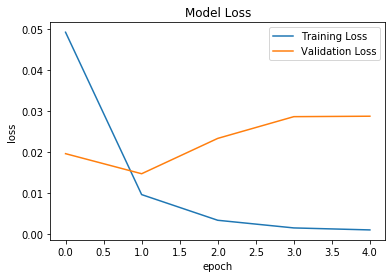

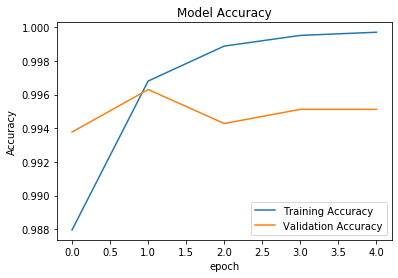

In [61]:
import matplotlib.pyplot as plt
plot_metrics(history)

# Tester avec des nouvelles transmissions

In [62]:
new_complaint = ["maintenir isolement doute grippe", 
                 "appel fille nouvelles récidive pneumopathie ème récidive mois dès arrêt antibiotiques \
                 infection redémarre fille aimerai faire point médecin traitant suite",
                "multiples fausses routes dernières semaines pneumopathies inhalation traitement atbrevoir \
                mt alimentation plaisir texture lisse type yaourt desserts", 
                "hospitalisée médecine thann bronchopneumopathie", 
                "faire test grippale mercredi journée conservation", 
                "nouvelles prises géria mr pneumopathie atbiothérapie débutée jour toujours porteur sad retour \
                domicile prévu"]
for tag_complaint in new_complaint :
    tag_complaint = [preprocess_clean(tag_complaint)]
    seq = tokenizer.texts_to_sequences(tag_complaint)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)

    labels = ['GRIPPE_IRA', 'rien']
    print('pred : ', labels[np.argmax(pred)])


pred :  GRIPPE_IRA
pred :  GRIPPE_IRA
pred :  GRIPPE_IRA
pred :  GRIPPE_IRA
pred :  GRIPPE_IRA
pred :  GRIPPE_IRA


In [358]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

In [25]:
model_dict = {'Dummy' : DummyClassifier(random_state=3),
              'Stochastic Gradient Descent' : SGDClassifier(random_state=3, loss='log'),
              #'Random Forest': RandomForestClassifier(random_state=3),
              #'Decsision Tree': DecisionTreeClassifier(random_state=3),
              #'AdaBoost': AdaBoostClassifier(random_state=3),
              'Gaussian Naive Bayes': GaussianNB(),
              #'K Nearest Neighbor': KNeighborsClassifier()
             }

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = .3, 
                                                    shuffle = True, 
                                                    #stratify = y, 
                                                    random_state = 42)

In [27]:
def model_score_df(model_dict):   
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list = [], [], [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        print('lancement de training....')
        v.fit(X_train, y_train)
        y_pred = v.predict(X_test)
        print(k, accuracy_score(y_test, y_pred))
        ac_score_list.append(accuracy_score(y_test, y_pred))
        p_score_list.append(precision_score(y_test, y_pred, average='macro'))
        r_score_list.append(recall_score(y_test, y_pred, average='macro'))
        f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
        model_comparison_df = model_comparison_df.sort_values(by='f1_score', ascending=False)
    return model_comparison_df




In [32]:
model_score_df(model_dict)

Dummy 0.9077936108878091
Stochastic Gradient Descent 0.952693534595317


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,model_name,accuracy_score,precision_score,recall_score,f1_score
0,Dummy,0.907794,0.142459,0.14251,0.142481
1,Stochastic Gradient Descent,0.952694,0.136099,0.142857,0.139396
